<a href="https://colab.research.google.com/github/sahil8104852330/OIBSIP/blob/main/OIBSIP_Task1_Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modules we are going to import

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
ab1 = pd.read_csv("Iris.csv")
# It reads the input

In [27]:
ab1.head()
# by default it will display first five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
ab1.describe()
# It will give the statistics summary of given dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [29]:
ab1.info()
# it displays the type of data and object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are 6 columns of which float64 of 4, int64 of 1 and object of 1.

In [30]:
# Checking the null values in the dataset:
ab1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
# Dropping the unneccessary features from the dataset
df = ab1.drop(['Id'], axis=1)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [32]:
print("The shape of the iris dataset", df.shape)

The shape of the iris dataset (150, 5)


In [33]:
df.describe()
# It will give the statistics summary of given dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
print("Each species are grouped by the column -",df.groupby('Species').size())

Each species are grouped by the column - Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Importing modules

In [35]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
df.mean()
# it will display the Average of input values

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

3. Displaying Bar Graph Analysis


a. UNIVARIATE ANALYSIS:

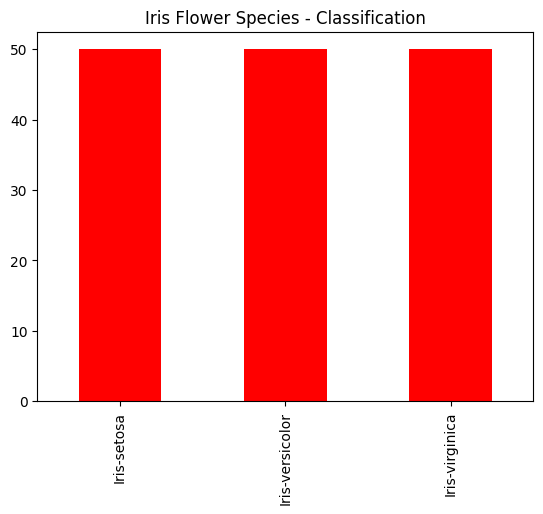

In [37]:
plot = df['Species'].value_counts().plot.bar(title='Iris Flower Species - Classification', color = 'red')

b. BIVARIATE ANALYSIS:

<Axes: xlabel='PetalLengthCm', ylabel='Species'>

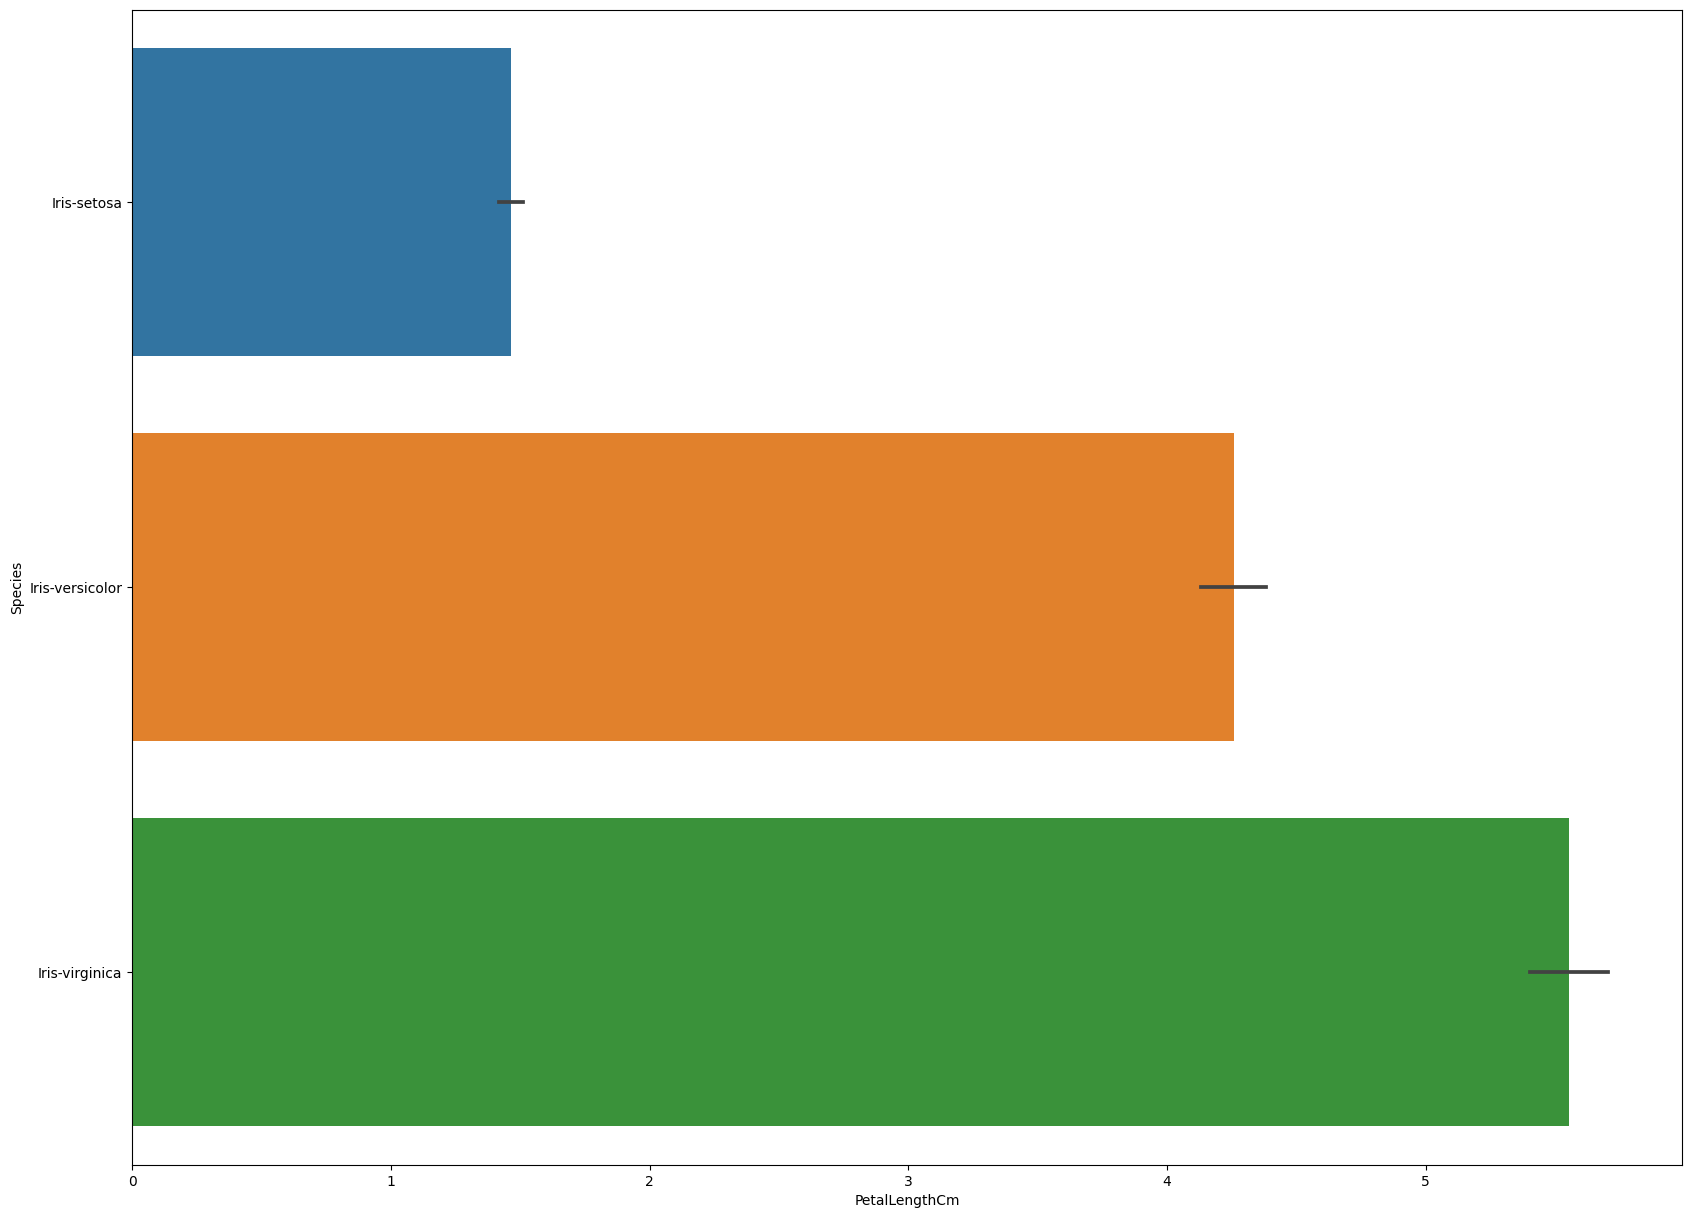

In [38]:
plt.figure(figsize=(20,15))
sns.barplot(y='Species', x='PetalLengthCm',data=df,orient = 'h')

c. MULTIVARIATE ANALYSIS:

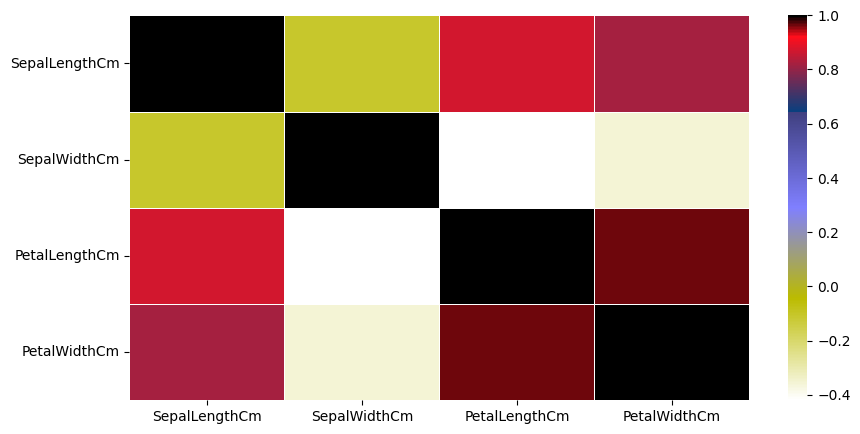

In [39]:
plt.figure(figsize=(10,5))

sns.heatmap(df.corr(),linewidths='.5',fmt='.1f',cmap='gist_stern_r')

plt.show()
# Association is visually represented. Values closer to -1 or 1 shows that 2 variables are closely associated.

# Values closer to 0 shows that 2 variables are weakly associated.

4. DATA MODELLING

Splitting the Dataset into Train and Test:

In [40]:
X = df.drop(columns='Species')
# X is an independent variable.

y = df['Species']
# Y is the target variable.

To display the summary statistics

In [41]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Modules we are going to import


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

using scale function for data pre-processing


In [43]:
Scaled = X.apply(zscore)
Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,-4.736952e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
SepalWidthCm,150.0,-6.631732e-16,1.00335,-2.438987,-0.587764,-0.124958,0.569251,3.114684
PetalLengthCm,150.0,3.315866e-16,1.00335,-1.568735,-1.227541,0.336266,0.762759,1.786341
PetalWidthCm,150.0,-2.842171e-16,1.00335,-1.444450,-1.181504,0.133226,0.790591,1.710902


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=10)

Printing the datasets

In [45]:
# Checking the Dimensions of Training and Testing Data
print("The Shape of X_train dataset:", X_train.shape)
print("The Shape of X_Test dataset:", X_test.shape)
print("The Shape of Y_Train dataset:", y_train.shape)
print("The Shape of Y_Test dataset:", y_test.shape)

The Shape of X_train dataset: (105, 4)
The Shape of X_Test dataset: (45, 4)
The Shape of Y_Train dataset: (105,)
The Shape of Y_Test dataset: (45,)


Machine Learning Model: Logistic Regression Model

In [46]:
logit = LogisticRegression()

logit.fit(X_train,y_train)

logit_pred = logit.predict(X_test)

print('Accuracy on Training Data:',logit.score(X_train,y_train))
#Training data accuracy

print('Accuracy on Testing Data:',logit.score(X_test,y_test))
#Testing Data Accuracy

Accuracy on Training Data: 0.9714285714285714
Accuracy on Testing Data: 1.0
